In [1]:
from molmap import loadmap
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, log_loss
import warnings, os

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from copy import copy
from tqdm import tqdm


warnings.filterwarnings("ignore")
os.environ["CUDA_VISIBLE_DEVICES"]="7"

In [2]:
from fmp import CalcFeatImp

In [3]:
dfx0 = pd.read_excel('./CRC.xlsx', sheet_name='data')
dfx0 = dfx0[dfx0.columns[1:]]
dfx = np.log(dfx0 + 1e-8)

feature_groups_df = pd.read_excel('./CRC.xlsx', sheet_name='feature_info')
feature_group_list = feature_groups_df.Group.tolist()

dfy_all = pd.read_excel('./CRC.xlsx', sheet_name='sample_info')
dfy = pd.get_dummies(dfy_all['Group'])


X = dfx.values.astype(float)
Y = dfy.values.astype(float)

In [4]:
country_idx = dfy_all.groupby(['Country']).apply(lambda x:x.index.tolist())
country_names = country_idx.index.tolist()

In [5]:
country_names

['AUS', 'CHI', 'FRA', 'GER', 'USA']

In [6]:
model_save_path = './model'
mp = loadmap('./model/aggmap.mp')

In [7]:
all_importance = {}
for train_country in country_names:

    train_idx = country_idx.loc[train_country]

    trainx = X[train_idx]
    trainY = Y[train_idx]
    
    trainX = mp.batch_transform(trainx, scale_method = 'standard')   
    
    model_name = os.path.join(model_save_path, '%s.h5' % train_country)

    model = load_model(model_name)
    arrX = trainX
    dfY = pd.DataFrame(trainY, columns = dfy.columns)
    df_imp = CalcFeatImp(model, mp, arrX, dfY, task_type = 'classification', apply_smoothing = True)
    all_importance.update({train_country: df_imp})

100%|##########| 109/109 [00:02<00:00, 40.20it/s]


2021-02-22 15:18:28,663 - INFO - [bidd-aggmap] - generate file: ./feature points_849_correlation_umap_mp
2021-02-22 15:18:28,689 - INFO - [bidd-aggmap] - save html file to ./feature points_849_correlation_umap_mp


  0%|          | 0/870 [00:00<?, ?it/s]

calculating feature importance for CRC ...


  0%|          | 0/870 [00:00<?, ?it/s]

calculating feature importance for CTR ...


100%|##########| 128/128 [00:00<00:00, 462.73it/s]


2021-02-22 15:18:57,962 - INFO - [bidd-aggmap] - generate file: ./feature points_849_correlation_umap_mp
2021-02-22 15:18:57,984 - INFO - [bidd-aggmap] - save html file to ./feature points_849_correlation_umap_mp


  0%|          | 0/870 [00:00<?, ?it/s]

calculating feature importance for CRC ...


  0%|          | 0/870 [00:00<?, ?it/s]

calculating feature importance for CTR ...


100%|##########| 114/114 [00:00<00:00, 439.21it/s]


2021-02-22 15:19:27,475 - INFO - [bidd-aggmap] - generate file: ./feature points_849_correlation_umap_mp
2021-02-22 15:19:27,498 - INFO - [bidd-aggmap] - save html file to ./feature points_849_correlation_umap_mp


  0%|          | 0/870 [00:00<?, ?it/s]

calculating feature importance for CRC ...


  0%|          | 0/870 [00:00<?, ?it/s]

calculating feature importance for CTR ...


100%|##########| 120/120 [00:00<00:00, 438.94it/s]


2021-02-22 15:19:55,232 - INFO - [bidd-aggmap] - generate file: ./feature points_849_correlation_umap_mp
2021-02-22 15:19:55,255 - INFO - [bidd-aggmap] - save html file to ./feature points_849_correlation_umap_mp


  0%|          | 0/870 [00:00<?, ?it/s]

calculating feature importance for CRC ...


  0%|          | 0/870 [00:00<?, ?it/s]

calculating feature importance for CTR ...


100%|##########| 104/104 [00:00<00:00, 423.04it/s]


2021-02-22 15:20:23,780 - INFO - [bidd-aggmap] - generate file: ./feature points_849_correlation_umap_mp
2021-02-22 15:20:23,802 - INFO - [bidd-aggmap] - save html file to ./feature points_849_correlation_umap_mp


  0%|          | 0/870 [00:00<?, ?it/s]

calculating feature importance for CRC ...


  0%|          | 0/870 [00:00<?, ?it/s]

calculating feature importance for CTR ...


100%|##########| 870/870 [00:12<00:00, 71.80it/s]


In [8]:
res = []
for k, v in all_importance.items():
    ts = v[['CTR_importance']]
    ts.columns =  [k]
    res.append(ts)
    
dfi = pd.concat(res, axis=1)

In [9]:
dfi = dfi.rename(columns = {'AUS':"AUS", 'CHI':'CHN', 'FRA':'FRA', 'GER':'DEU', 'USA':'USA'})

In [10]:
from matplotlib.ticker import FormatStrFormatter

4.7
4.3
5.1
5.5
4.1


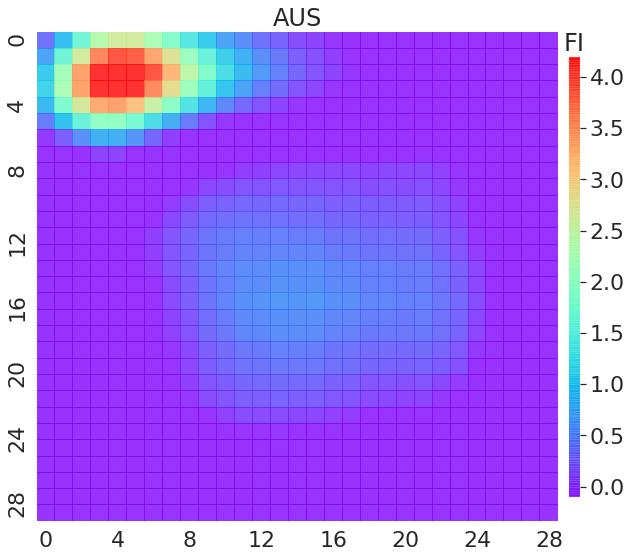

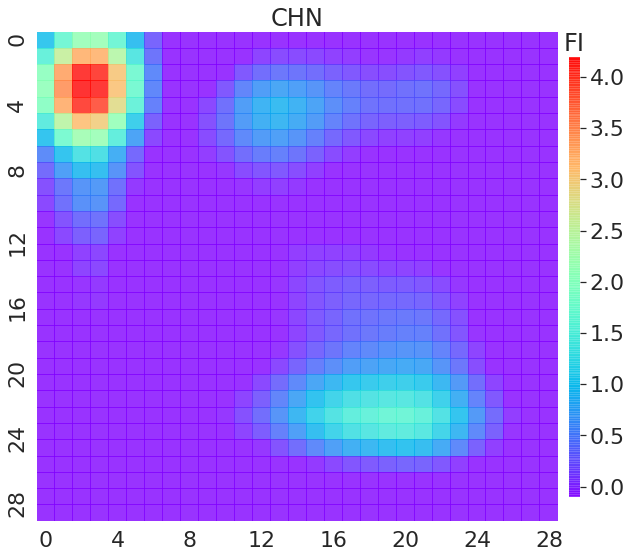

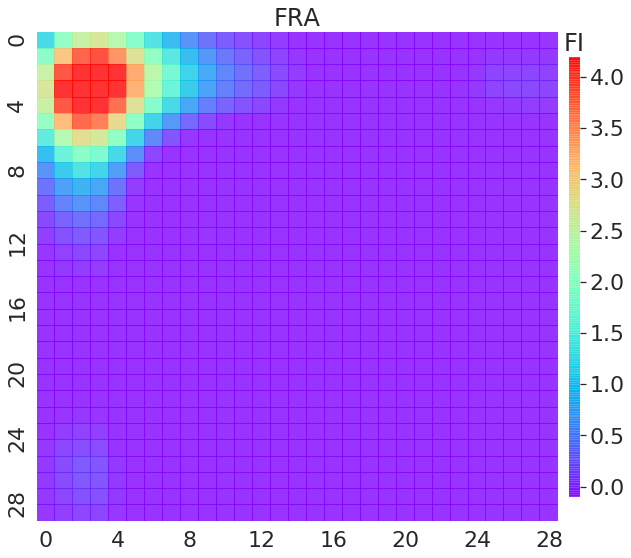

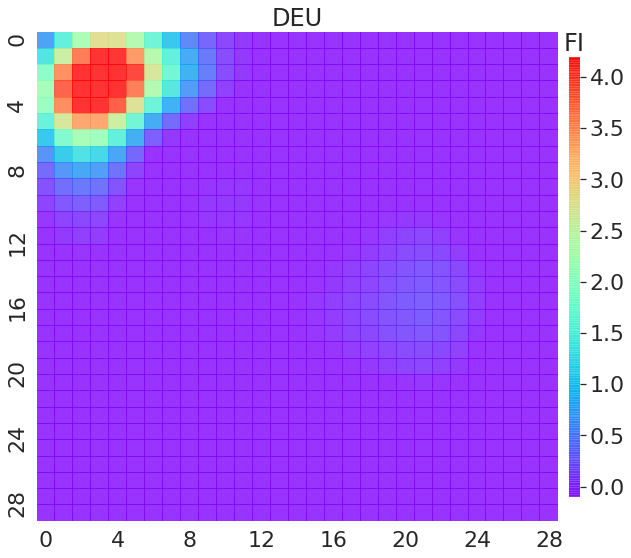

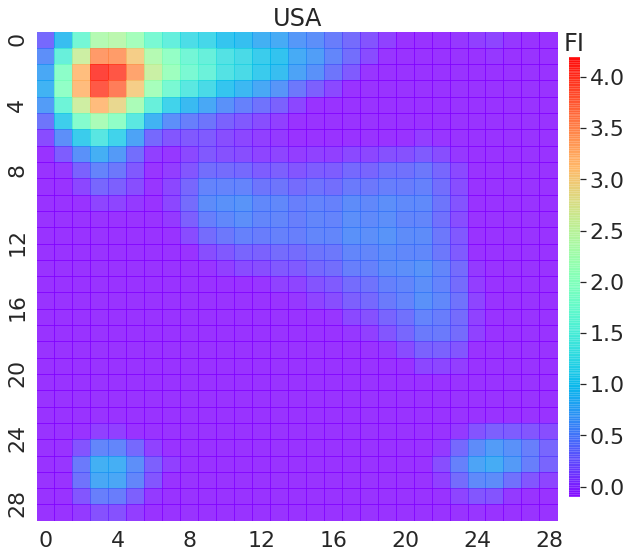

In [35]:
for country in dfi.columns:    
    sns.set(style='white',  font='sans-serif', font_scale=2)
    fig, ax  = plt.subplots(1, 1, figsize=(10, 9))

    IMPM = dfi[country].values.reshape(*mp.fmap_shape)
    
    print(IMPM.max().round(1))
    sns.heatmap(IMPM,  
                cmap = 'rainbow', alpha = 0.8, xticklabels=4, ax =ax,
                yticklabels=4, vmin = -0.1, vmax = 4.2,
                cbar_kws = {'fraction':0.046, 'shrink':0.9, 'aspect': 40, 'pad':0.02, })

    bottom, top = ax.get_ylim()
    #ax.set_ylim(bottom + 0.5, top - 0.5)

    ax.set_title(country)
    cbar = ax.collections[0].colorbar
    cbar.ax.set_title('FI')
    cbar.ax.yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
    
    plt.subplots_adjust(wspace = 0.18)

    plt.savefig('./results/FI_%s.png' % country, dpi = 400, bbox_inches="tight")


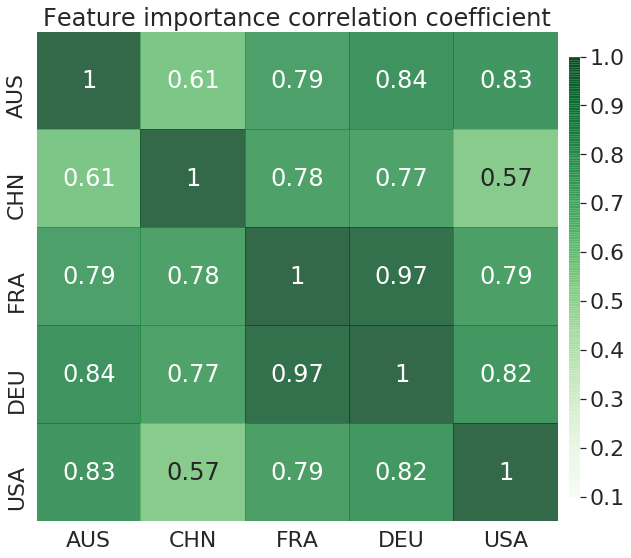

In [36]:
sns.set(style='white',  font='sans-serif', font_scale=2)
fig, ax  = plt.subplots(1, 1, figsize=(10, 9))

IMPM = dfi.corr()
sns.heatmap(IMPM,  
            yticklabels = IMPM.columns, # xticklabels=4,yticklabels=4,
            xticklabels = IMPM.columns,
            cmap = 'Greens', alpha = 0.8, ax =ax,
            vmin = 0.1, annot = True,
            cbar_kws = {'fraction':0.046, 'shrink':0.9, 'aspect': 40, 'pad':0.02, })


ax.set_title("Feature importance correlation coefficient")


plt.subplots_adjust(wspace = 0.18)
plt.savefig('./results/FI_all_corr.png', dpi = 400, bbox_inches="tight")

In [105]:
df_save = all_importance['CHI'][['x', 'y', 'v', 'Subtypes', 'colors', ]].join(dfi)

In [106]:
df_save = df_save.set_index('v')

In [107]:
df_save['5_countries_average_importance'] = dfi.mean(axis=1).values

In [108]:
df_save = df_save.sort_values('5_countries_average_importance', ascending = False)
df_save = df_save.join(mp.df_embedding[['x','y']].rename(columns = {'x':'scatter_x','y':'scatter_y'}))


In [110]:
df_save.sort_values('5_countries_average_importance', ascending = False).head(15)[['x', 'y',  'Subtypes', '5_countries_average_importance']]

,x,y,Subtypes,5_countries_average_importance
unknown Dialister [meta_mOTU_v2_5867],3,2,cluster_03,4.592081
Fusobacterium nucleatum s. vincentii [ref_mOTU_v2_0754],3,3,cluster_03,4.565284
Anaerococcus obesiensis/vaginalis [ref_mOTU_v2_0429],4,2,cluster_02,4.199503
Parvimonas sp. [ref_mOTU_v2_4961],2,3,cluster_03,4.198792
Parvimonas sp. [ref_mOTU_v2_5245],2,2,cluster_03,4.082373
Peptostreptococcus anaerobius [ref_mOTU_v2_0148],4,3,cluster_03,4.040472
Alloprevotella tannerae [ref_mOTU_v2_4636],3,4,cluster_03,3.945557
Fusobacterium nucleatum s. animalis [ref_mOTU_v2_0776],3,1,cluster_03,3.729593
Prevotella oris [ref_mOTU_v2_0520],2,4,cluster_03,3.724844
Porphyromonas somerae [ref_mOTU_v2_2101],4,1,cluster_02,3.498697


In [42]:
from scipy.stats import pearsonr

In [111]:
pccs = []
ps = []
for i in dfi.columns:
    for j in dfi.columns:
        pcc, p = pearsonr(dfi[i], dfi[j])
        pccs.append(pcc)
        ps.append(p)

In [112]:
df1 = pd.DataFrame(np.array(pccs).reshape(5,5), columns = dfi.columns, index = dfi.columns)

In [113]:
df2 = pd.DataFrame(np.array(ps).reshape(5,5), columns = dfi.columns, index = dfi.columns)

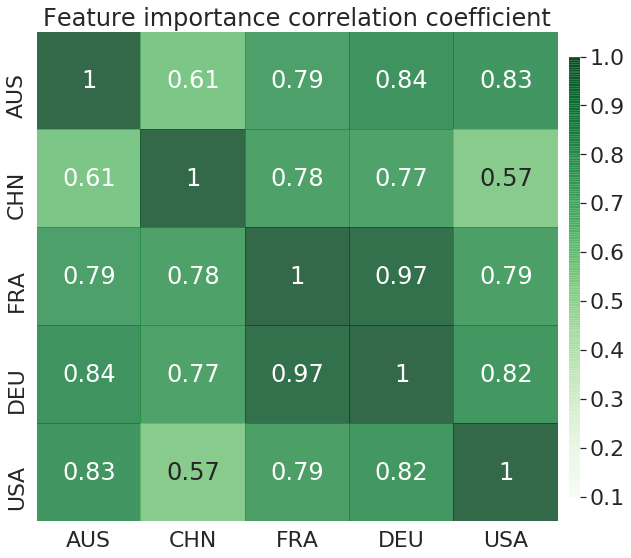

In [114]:
sns.set(style='white',  font='sans-serif', font_scale=2)
fig, ax  = plt.subplots(1, 1, figsize=(10, 9))


sns.heatmap(df1,  
            yticklabels = df1.columns, # xticklabels=4,yticklabels=4,
            xticklabels = df1.columns,
            cmap = 'Greens', alpha = 0.8, ax =ax,
            vmin = 0.1, annot = True,
            cbar_kws = {'fraction':0.046, 'shrink':0.9, 'aspect': 40, 'pad':0.02, })


ax.set_title("Feature importance correlation coefficient")


plt.subplots_adjust(wspace = 0.18)
#plt.savefig('./model/all.svg', dpi = 400, bbox_inches="tight")

In [115]:
f1 = df_save.sort_values('5_countries_average_importance', ascending = False)

In [204]:
#f1 = f1.head(20)
#f = f1.reset_index(drop = True)
#f.index = f.index.map(lambda x:'microbe-%s' % str(x+1).zfill(2))

N = 20
f = f1.head(N)
f['genus'] = f.index.map(lambda x:x.split(' ')[0].replace(']',''))
f.genus.iloc[0] = 'Dialister'
f.index = f.index.map(lambda x:x.split(' [')[-1].replace(']',''))

In [205]:
from statannot import add_stat_annotation
cols = f1.index.tolist()
ncols = f.index.tolist()

y  = 'log10 Intensity'
hue = 'Group' 
x = 'Microbial species'


all_data = []
for col, ncol in zip(cols, ncols):
    v = dfx[col]
    #x = mp.StandardScaler(x,  x.mean(), x.std())
    dfd = v.to_frame(name = y).join(dfy_all['Group'].to_frame(name = hue))
    dfd[x] = ncol
    all_data.append(dfd)

In [206]:
data = pd.concat(all_data, axis=0)
data[x] = data[x]


box_pairs = [((col, "CRC"), (col, "CTR")) for col in pd.Series(ncols).map(lambda x:x.split(' [')[-1].replace(']',''))]
order = ncols

#****P < 0.0001 by two-tailed Wilcoxon rank sum test.

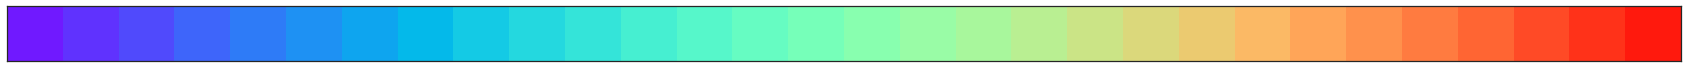

In [207]:
color = sns.color_palette('rainbow', len(f) + 10).as_hex()
sns.palplot(color)

In [208]:
# coldic = pd.Series(color, index = f.groupby('genus').size().sort_values().index).to_dict()
# f['color'] = f['genus'].map(coldic)

In [209]:
sns.set(style='white',  font='sans-serif', font_scale=2)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

ref_mOTU_v2_2101_CTR v.s. ref_mOTU_v2_2101_CRC: Mann-Whitney-Wilcoxon test two-sided, P_val=8.846e-10 U_stat=3.530e+04
meta_mOTU_v2_5486_CTR v.s. meta_mOTU_v2_5486_CRC: Mann-Whitney-Wilcoxon test two-sided, P_val=1.486e-05 U_stat=3.689e+04
ref_mOTU_v2_4064_CTR v.s. ref_mOTU_v2_4064_CRC: Mann-Whitney-Wilcoxon test two-sided, P_val=6.618e-02 U_stat=3.979e+04
ref_mOTU_v2_0515_CTR v.s. ref_mOTU_v2_0515_CRC: Mann-Whitney-Wilcoxon test two-sided, P_val=7.665e-11 U_stat=3.505e+04
ref_mOTU_v2_1404_CTR v.s. ref_mOTU_v2_1404_CRC: Mann-Whitney-Wilcoxon test two-sided, P_val=2.353e-04 U_stat=3.884e+04
ref_mOTU_v2_1145_CTR v.s. ref_mOTU_v2_1145_CRC: Mann-Whitney-Wilcoxon test two-sided, P_val=5.340e-23 U_stat=2.406e+04
ref_mOTU_v2_0531_CTR v.s. ref_mOTU_v2_0531_CRC: Mann-Whitney-Wilcoxon test two-sided, P_val=1.108e-13 U_stat=2.966e+04
r

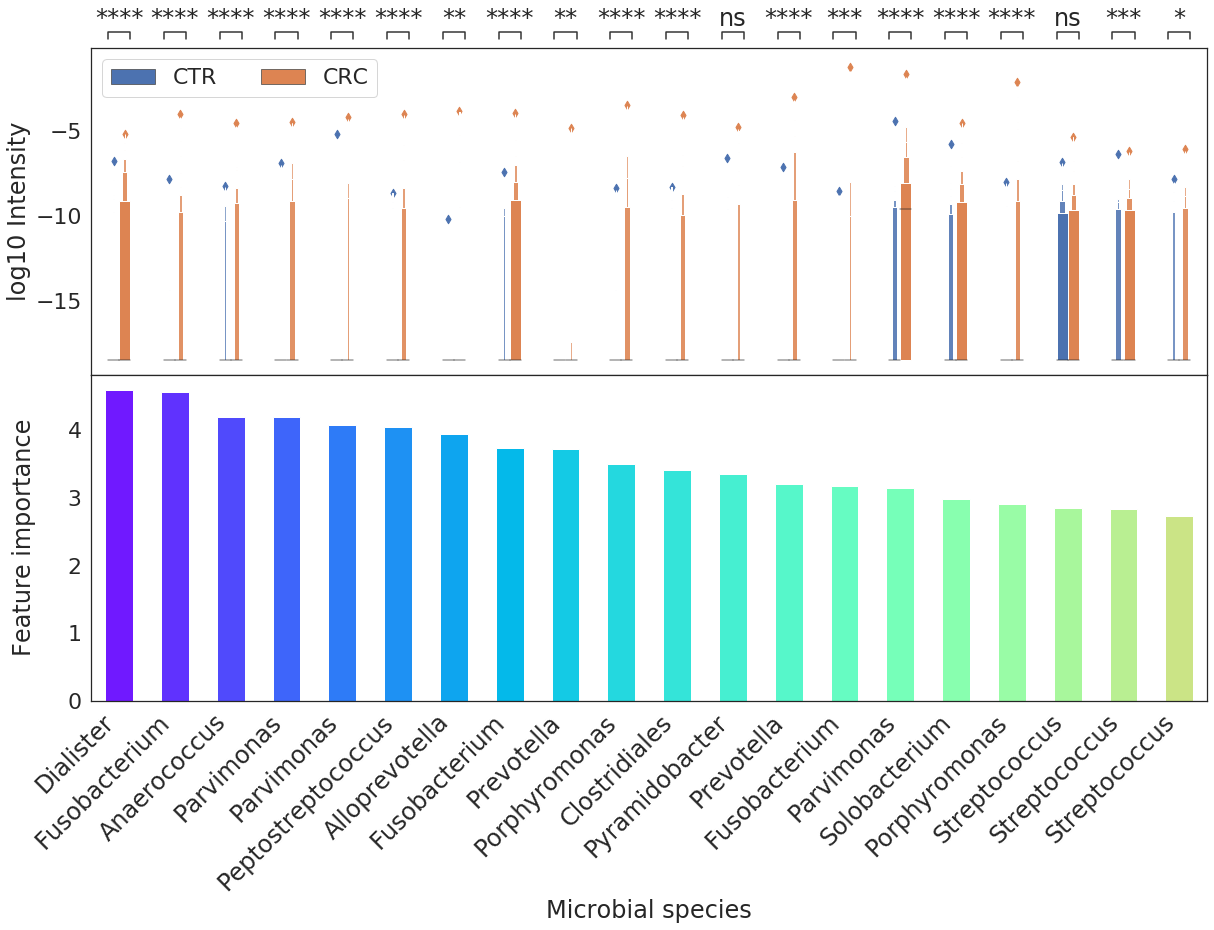

In [211]:
fig, ax  = plt.subplots(2, 1, figsize=(20, 12), sharex=True)

ax, ax2 = ax
# g = sns.swarmplot(x=x, y=y, hue = hue, data=data, color= ".2", order = order, ax= ax, size = 6,
#                      split=True,   linewidth=1, edgecolor='gray') #palette="Set2",palette = [".8", ".8"] jitter=True,
    
flierprops = dict(marker = 'o',markerfacecolor='0.75', markersize=5, linestyle='none')
    
sns.boxenplot(data = data,y=y, x = x, hue = hue,  ax = ax, width = 0.4, saturation = 1,
              #k_depth = "proportion" , scale = 'linear', 
              order = order) # palette="Set1_r", , flierprops = flierprops

ax, test_results = add_stat_annotation(ax, data=data, x=x, y=y, hue = hue, test='Mann-Whitney', 
                                       box_pairs=box_pairs, comparisons_correction=None,
                                       text_format='star', loc='outside', verbose=2)
ax.set_ylabel(y,)

#ax.set_ylim(-10, -2)


ax.legend(loc='upper left',fancybox=True,  ncol=2)

p = f['5_countries_average_importance'].tolist()
p = [{i: j} for i, j in enumerate(p)]
p = pd.DataFrame(p, index = f.index)
p.plot(kind ='bar',stacked=True, ax = ax2, color = color, legend=False, )

ax2.set_ylabel('Feature importance', labelpad = 32)
ax2.set_xlabel(x)
ax2.set_xticklabels(labels = f.genus.tolist(), rotation=45, ha='right', fontsize = 24)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.000)
plt.savefig('./results/statistic_test.png', dpi=400, bbox_inches='tight')

In [203]:
from scipy.stats import mannwhitneyu

In [195]:
p_values = []
for c in df_save.index:
    if c != 0:
        v1 = dfx[[c]]
        v2 = dfy[['CTR']]
        xx = v1.join(v2).groupby('CTR')[c].apply(lambda x:x.to_list())    
        s, p = mannwhitneyu(xx[0], xx[1], alternative='two-sided')
        p_values.append(p)
    else:
        p_values.append(None)

In [33]:
df_save['mannwhitneyu_p-value'] = p_values
df_save = df_save.rename(columns = {'x':'grid_x','y':'grid_y'})
df_save = df_save[['scatter_x', 'scatter_y', 'grid_x', 'grid_y', 'Subtypes', 'colors', 'AUS', 'CHN', 'FRA', 'DEU', 
                   'USA', '5_countries_average_importance', 'mannwhitneyu_p-value']]

df_save = df_save.sort_values('5_countries_average_importance',ascending=False)

df_save.to_excel('./results/feature_importance.xlsx')


In [34]:
df_save.head(10)

,scatter_x,scatter_y,grid_x,grid_y,Subtypes,colors,AUS,CHN,FRA,DEU,USA,5_countries_average_importance,mannwhitneyu_p-value
unknown Dialister [meta_mOTU_v2_5867],-3.071615,-5.780581,3,2,cluster_03,#00fff6,4.397301,4.074878,4.915895,5.495662,4.076667,4.592081,2.239343e-22
Fusobacterium nucleatum s. vincentii [ref_mOTU_v2_0754],-3.061289,-5.761417,3,3,cluster_03,#00fff6,4.226112,4.146640,5.011592,5.510577,3.931500,4.565284,2.128607e-09
Anaerococcus obesiensis/vaginalis [ref_mOTU_v2_0429],-2.379688,-6.086523,4,2,cluster_02,#08ff00,4.727071,3.053835,4.237424,5.024608,3.954576,4.199503,1.094188e-07
Parvimonas sp. [ref_mOTU_v2_4961],-3.151201,-5.734058,2,3,cluster_03,#00fff6,3.380094,4.272803,5.077494,5.086095,3.177474,4.198792,6.719280e-10
Parvimonas sp. [ref_mOTU_v2_5245],-3.093557,-5.779282,2,2,cluster_03,#00fff6,3.394010,4.147750,4.869903,4.833230,3.166971,4.082373,3.138943e-06
Peptostreptococcus anaerobius [ref_mOTU_v2_0148],-2.986353,-5.829257,4,3,cluster_03,#00fff6,4.429470,3.058171,4.227407,4.807348,3.679964,4.040472,1.749134e-05
Alloprevotella tannerae [ref_mOTU_v2_4636],-3.037899,-5.734781,3,4,cluster_03,#00fff6,3.320827,3.898383,4.604690,4.712016,3.191871,3.945557,1.774984e-03
Fusobacterium nucleatum s. animalis [ref_mOTU_v2_0776],-2.962970,-5.871783,3,1,cluster_03,#00fff6,3.599258,3.199598,3.994959,4.386704,3.467447,3.729593,2.651746e-19
Prevotella oris [ref_mOTU_v2_0520],-3.149555,-5.702577,2,4,cluster_03,#00fff6,2.688122,4.033742,4.745257,4.541983,2.615117,3.724844,2.317378e-03
Porphyromonas somerae [ref_mOTU_v2_2101],-2.255905,-6.134926,4,1,cluster_02,#08ff00,3.958058,2.416314,3.501926,4.169316,3.447872,3.498697,8.845713e-10
